# Tutorial 1: Machine precision, rounding errors, and an introduction to randomness

In this first tutorial, you will explore why some aspects that are universally important to performing calculations using a computer. You will find different kinds of exercises throughout this notebook. In some cases, you are asked to answer a conceptual question. Use, for example, a comment or a docstring in the code cell to write down your answer (such that you don't forget about it later). 

#### Reading/preparation:

 - Read section 2.4 on number representations and 3.1 on error sources.
 - Read section 4.2.1 on random number generation.
 - Read and understand the derivation in eqs. 4.18-4.21 in the book
 - Refresh your knowledge by reviewing the sections on functions, list manipulation, and plotting with `matplotlib` of the first week's tutorials.
 
#### Notes on the exercises:
- The exercises in this tutorial are adapted from the book of Landau. The number between parentheses in the question title indicates the corresponding problem in the book of landau.
- In some cases, the version of the question in the book of Landau comes with sample code. We strongly urge you to follow the steps of the exercise in the tutorial notebooks instead of copying the code from the book: not only does it help you to develop your programming skills more, the codes in the book unfortunately contain mistakes or examples of bad programming as well. Moreover, the questions that we ask in the tutorials might require you to write different pieces of code than the versions in the book do.  

## Problem 1: Series expansion of sin(x): machine precision and rounding errors (2.5.2, 3.3.1)
In this question, you will try to perform a numerical summation to evaluate the series expansion of $\sin{x}$ and assess the different factors that influence the stability and performance of your code. The series expansion of $\sin{x}$ can be expressed as the following:
$$\sin{x} \approx \sum_{n=1}^{N}\frac{(-1)^{n-1}x^{2n-1}}{(2n-1)!)},$$
where the summation over $n$ would allow you to evaluate $\sin{x}$ in an interval of say, $|x|\leq2\pi$.

1. Why would numerically evaluating this sum as described above be a bad idea?

In order to properly perform the summation using a simple piece of code, we can instead of calculating the sum straight away, express each $n\,$th value of the sum in its preceding value $n-1$ instead (For a derivation of this result, see eq. 2.29 in the book). Re-writing the sum provides us with an expression that can more easily be implemented in our code:
$$n\,\mathrm{th \, term} = \frac{-x^2}{(2n-1)(2n-2)}\times(n-1)\,\mathrm{th \, term.}$$ 

2. With an update rule for each $n$th term in place, it is time to write the code for evaluating the series expression. Define a function `calculateSin(x,numIters,tolerance)` that returns the series expansion of $\sin{x}$ given an input $x$, a number of iterations `numIter` and a `tolerance` (see below) of $10^{-8}$.         
**Some hints below**:
- You can use a variable `term` that you repetitively update and add to a sum (that you initialize in the function) 
- Make sure to carefully consider over what range of iterations to loop (i.e., what starting value should the expansion use?)
- Make the function return the series expansion (i.e., the sum value of all terms) when a tolerance of  $\epsilon=|\frac{n\,\mathrm{th \, term}}{\mathrm{sum}}| \leq 10^{-8}$ is reached.

3. Define a range of $x$-values on the interval $x= [-2\pi,+2\pi]$ using `np.linspace(startingValue,endingValue,numberOfIntervals)` 
4. Use a list comprehension to build a list that contains the estimates of $\sin{x}$ using your `calculateSin`- function on the range of $x$-values that you just defined. Use 10000 iterations in your `calculateSin`-function.
5. Repeat the above for the analytical value of $\sin{x}$ by using the built-in `sin(x)`-function of the `math` module.
6. You can also calculate the relative error in your estimate via $(estimate-real)/real\cdot100\%$. Using a smart list comprehension (use a construction like `for estimate,real in zip(listWithEstimates,listWithEstimates`) you can do this in one line.
7. Use `matplotlib` to plot your two lists with estimates and analytical values against the range of $x$-values), and also plot the relative error for each x-value in a separate graph. Does your algorithm converge well for all the $x$-values on the provided interval? For which $x$-values do you expect the algorithm to fail?
8. Try to increase $x$ outside of the range $| x | \leq 2\pi$, and see whether your algorithm still converges, i.e. increase the range a factor 10,100,1000, etc. What happens when the $x$-values become large?

#### Convergence study and error analysis:
You might have seen that around specific values, the relative error increases sharply. Let's look into errors a bit further.

1. Based on the value of the tolerance, what accuracy do you expect of the algorithm? How does the relative error change if you keep increasing the tolerance with powers of 10? What kind of error is involved?
2. Coming back to the error propagation for large x-values: What kind of error is involved, and what simple tweak could you use to make your code robust against these kind of errors? Hint: it revolves around certain properties of the $\sin{x}$-function.
3. (If time allows, otherwise this is optional) Time to make a study of the effect of the amount of series sums on the accuracy. Make the following small modifications to the code above:
- Change the code such that it produces an output regardless of whether the tolerance is reached
- Instead of varying over x-values as input, you can use the same kind of construction (using list comprehensions) to iterate over n-Values. Values below 50 are most interesting for this problem. Use $x=3\pi$ as the (fixed) x-value.
4. After plotting the relative error vs. the amount of series, what can you tell on the type of error involved?






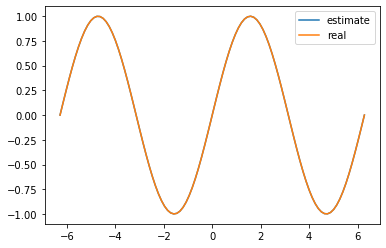

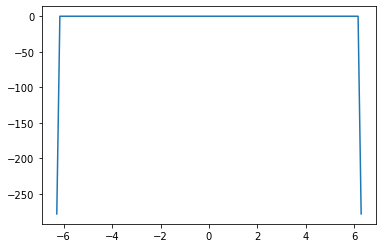

In [30]:
%matplotlib inline

import math
from matplotlib import pyplot as plt
import numpy as np

def nth_term(x, n, prev_term):
    return prev_term * -1* x**2 / ((2*n-1)*(2*n-2))

def calculateSin(x, numIters, tolerance):
    t = x
    s = 0
    for n in range(2, numIters):
        s += t
        t = nth_term(x, n, t)
        e = abs(t/s)
        if e < tolerance:
            break
    
    return s

x = np.linspace(-2*np.pi, 2*np.pi, 100)

estimates = []
reals = []
for x_i in x:
    estimates.append(calculateSin(x_i, 10000, 1e-8))
    reals.append(math.sin(x_i))

relative_error = [100*(estimate-real)/real for estimate, real in zip(estimates, reals)]

figure1 = plt.figure()
plt.plot(x, estimates)
plt.plot(x, reals)
plt.legend(['estimate', 'real'])
plt.show()

figure2 = plt.figure()
plt.plot(x, relative_error)
plt.show()

## Problem 2: Random numbers from the linear Congruent Method (4.2.2)
In several types of physics simulations, the use of random numbers is important. However; not all "random" numbers are as random as they are supposed to be. In the Linear Congruent Method, you generate a pseudorandom sequence of numbers $0\,\leq\,r_i\,\leq\,M-1$ over the interval $[0,M-1]$ using the following rule for generating the $r_{i+1}$th random number, given a previous number $r_i$:

$$r_{i+1}=(ar_i+c)\mathrm{mod}{M}$$



In this problem, your goal is to calculate a list of $N$ random numbers using the Linear Congruent Method, and see how it holds up as a random number generator.

**Exercises**
1. Define a function `lcrandom(N, a, c, M, r0)` (where lc stands for linear congruent method) which returns a list containing `N` numbers of a random sequence following the linear congruent method ($r_0$ is the seed and thus the initial value). You can define a list containing only `r0` and append the values generated by the LCM to it. Before returning the sequence as an output, the function should normalize the numbers in the resulting sequence and rescale it such that all numbers lie between -1 and 1. Before starting to actually write the code, design a pseudocode and discuss this code with your neighbor.
2. Test your code by feeding it some input numbers and printing the output. Looks random, right?
2. Now try the (unwise) settings $(a, c, M, r_0) = (57, 1, 256, 10)$ and determine the periodicity of the resulting sequence (choose a value of $N$ that is large enough to do so). Use matplotlib to make a xy-plot of $r_i$ vs $i$ to observe the periodicity.
3. Create another random sequence using the `random` module. You can use `random.seed` to obtain reproducable results. For both sequences, make scatter plots of $r_{2i-1}$ vs $r_{2i}$ to visualize differences.
4. Compare the plots with a third choice, namely $(a, c, M, r_0) = (5DEECE66D, B, 2^{28}, 10)$. Here, the constants `a` and `c` are written in hexademical notation. This can be implemented in Python by writing '`0x5DEECE66D`' and '`0xB`' respectively.
5. *Optional*. Check the randomness of the random numbers by calculating 
$$\qquad \frac{4}{N}\sum_{i=1}^{N}x_{i}x_{i+k}.$$
Ideally, the answer lies around $1$ for any $k$ (see Eq 4.16 in the book). Which random number generator would you use?

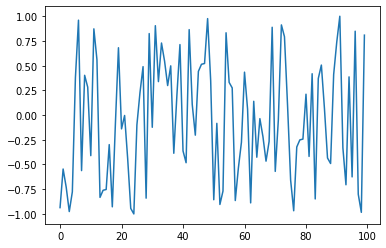

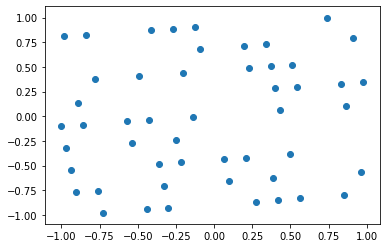

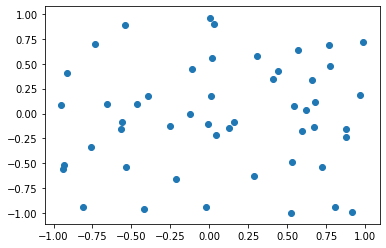

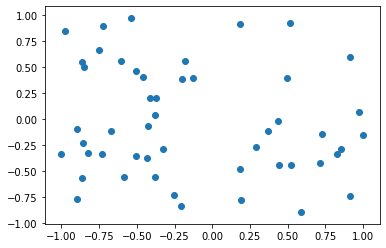

(1.12035047062745, 1.1203504706274503)
(0.9097661230616685, 0.9097661230616687)
(1.0054194337688958, 1.0054194337688958)


In [20]:
import random
import numpy as np
import math
from matplotlib import pyplot as plt
# you'll need the above.

def lcrandom(N, a, c, M, r0):
    l = np.array([r0])
    for i in range(1,N):
        l = np.append(l, (a*l[i-1]+c)%M)
    l -= min(l)
    l = 2*l/max(l)
    l -= 1
    return l

N = 100
unwise_settings = lcrandom(N, 57,1,256,10)
fig1 = plt.figure()
plt.plot(np.arange(0,N), unwise_settings)
plt.show()

random.seed(1)
another_random_seq = np.array([random.uniform(-1,1) for i in range(N)])

i2 = np.arange(1,N+1,2)
i2m1 = np.arange(0,N,2)

fig2 = plt.figure()
plt.scatter(unwise_settings[i2m1], unwise_settings[i2])
plt.show()

fig3 = plt.figure()
plt.scatter(another_random_seq[i2m1], another_random_seq[i2])
plt.show()

ex5 = lcrandom(N, 0x5DEECE66D,0xB,2**28,10)
fig4 = plt.figure()
plt.scatter(ex5[i2m1], ex5[i2])
plt.show()

def randomness(l):   
    k = 1
    mine = (4/len(l)) * sum(abs(l*np.roll(l,-k)))
    theirs = 4*np.sum([abs(l[i]*l[(i+k)%len(l)]) for i in range(0,len(l))])/len(l)
    return mine, theirs
print(randomness(unwise_settings))
print(randomness(another_random_seq))
print(randomness(ex5))

## Problem 3: Radioactive decay using random numbers (4.5)

This problem revolves around using random number generation to simulate radioactive decay. In particular, you determine when radioactive decay looks like exponential decay and when it looks stochastic. If you have already read section 4.5 of the book you can jump to section **Numerical simulation of discrete decay**.

### Spontaneous decay

Spontaneous decay is a natural process in which a particle, with no external
stimulation, decays into other particles. The probability of decay of each particle in any time interval is constant. Since the exact moment when a particle decays is always random, and since one nucleus does not influence another nucleus, the probability of decay is not influenced by how long the particle has been around or whether some other particles have decayed. In other words, the probability $P$ of any particle decaying per unit time interval is a constant, yet when that particle decays it is gone forever.

### Discrete decay

Imagine having a sample containing $N(t)$ radioactive nuclei at time t. Let $\Delta N$ be the number of particles that decay in some small time interval $\Delta t$. We convert the statement *the probability of any one particle decaying per unit time is a constant* into the equation:

$$
P=\frac{\Delta N(t)/N(t)}{\Delta t}=-\lambda, \;\;\;\;\;\;\;\;(1)
$$

**Explain** in your own words why the above equation can be derived from the previous statement?

$$
\frac{\Delta N(t)}{\Delta t}=-\lambda N(t) \;\;\;\;\;\;\;\; (2)
$$

where the constant $\lambda$ is called the decay rate and the minus sign indicates a decreasing number. Because $N(t)$ decreases in time, the *activity* $\Delta N(t)/\Delta t$ also decreases with time. Equation (2) is a finite-difference equation relating quantities $N(t)$, $\Delta N(t)$, and $\Delta t$. Although this equation cannot be integrated, it can be simulated numerically. 

### Continuous Decay 


When the number of particles $N \rightarrow ∞$ and the observation time interval $\Delta t \rightarrow 0$, our difference equation becomes a differential equation, and we obtain the familiar exponential decay law:

$$\frac{\Delta N(t)}{\Delta t} \rightarrow \frac{dN(t)}{dt}=-\lambda N(t) \;\;\;\;\;\;\;\; (3)$$ 

This can be integrated to obtain the time dependence of the total number of particles:

$$
N(t)=N(0)e^{-\lambda t} \;\;\;\;\;\;\;\; (4)
$$

We see from its derivation that the exponential decay is a good description of nature for a large number of particles. However, in nature $N(t)$ can be a small number, and in that case we have a statistical and not a continuous process. The basic law of nature in equation (1) is always valid, but as we will see in the simulation, the exponential decay becomes less and less accurate as the number of particles gets smaller and smaller.




### Numerical simulation of discrete decay 

### Exercise

Follow the below description and write a psuedocode to simulate the radioactive decay starting from an initial number of particles/nuclei $N(0)$.

1. First, keep in mind that particle decay is a random process and the probability $P$ of any particle decaying per unit time interval is a constant. 

2. Import the python packages that you might need in this exercise.

```
import matplotlib.pyplot as plt 
import matplotlib.animation as animation 
import numpy as np 
import pickle
```

3. Initialize your variables (such as initial number of particles, total time steps, $\lambda$, etc), or pack the decay calculation into a function that takes these variables as an input. Choose a very low value for $\lambda$ (< 0.01) to simulate a gradual decay.

4. Create nested loops: a loop over the amount of particles within a loop over timesteps. For each time step, check all the particles to see whether they decay or not. Since the decay probability is propotional to $\lambda$ and it is constant for all particles, for each particle you can generate a random number with `np.random.rand()` and compare it with $\lambda$ to determine whether decay occurs.  

5. For each time interval count the number of nuclei left, $N(t)$, and the number of nuclei that have decayed during that $\Delta t$ and save them in a list/array. Note that $\Delta t$=1 in your simulation.
 

6. Quit your simulation after a specific total time or when there are no nuclei left to decay. You can choose either of those cases.


Now that you have the pseudocode, write your the actual code and answer the following questions.
#### Questions

1. Run your code for different number of initial particles $N(0)=10000, 1000, 100, 10$. Check that you obtain what looks like exponential decay when you start with large values for $N(0)$, but that the decay displays its stochastic nature for small $N(0)$.


2. For $N(0)=10000$, use subplots to plot $N(t)$, $\frac{\Delta N(t)}{(\Delta t =1)}$, and $\frac{\Delta N(t)}{N(t)/(\Delta t =1)}$ vs. time. For the first $100$ time steps compute the averge $\frac{\Delta N(t)}{N(t)/(\Delta t =1)}$ and compare it to $\lambda$. Interpret your results based on equation (1) and what you have already learned from exponential and stochastic decays. 


3. Plot the logarithm of the number left $log(N(t))$   vs. time for $N(0)=100000, 10000, 1000$ all in the same graph (you should obtain results like those in Figure 4.6 of the book). Show that the slopes are independent of $N(0)$.
*Hint: you can loop around the code you have written and use `np.log10()` to take the logarithm* 

4. Choose $N(0)=10000$ and plot $log(N(t))$   vs. time for different values of $\lambda$. Show that the slopes are proportional to the value chosen for $\lambda$.


5. Run your code for $N(0)=10000$ and save the resulting $N(t)$ profile using the `pickle package`. In another code cell load $N(t)$ and create an animated plot for $log(N(t))$   vs. time. *Hint: use the code provided in tutorial C week 1 to make an animated plot*

0.00989775471862224


<Figure size 432x288 with 0 Axes>

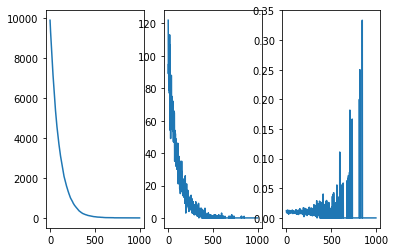

c:\users\hayoo\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


<Figure size 432x288 with 0 Axes>

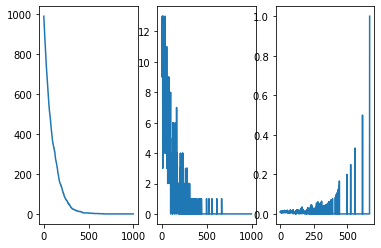

<Figure size 432x288 with 0 Axes>

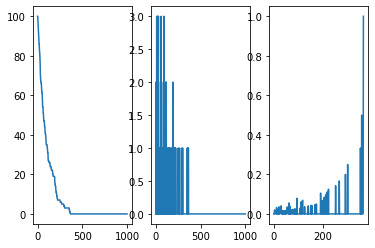

<Figure size 432x288 with 0 Axes>

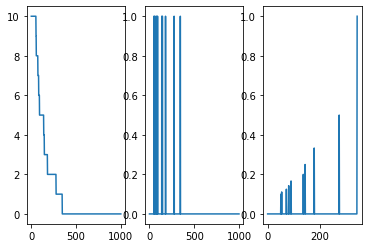

c:\users\hayoo\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in log10
c:\users\hayoo\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in log10


<Figure size 432x288 with 0 Axes>

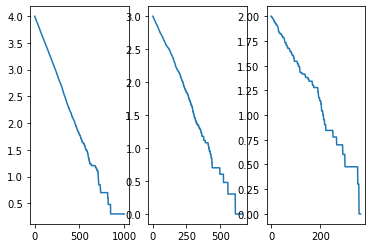

In [8]:
import matplotlib.pyplot as plt 
import matplotlib.animation as animation 
import numpy as np 
import pickle

def discrete_decay(N, t_steps, decay_rate):
    Nt = []
    for t in range(0, t_steps):
        
        rands = np.random.uniform(size=(N,))
        N = sum(rands>decay_rate)
        Nt.append(N)
    return Nt
        
Ns = {10000:[], 1000:[], 100:[], 10:[]}

for i, N in enumerate(Ns.keys()):
    decay_rate = 0.01
    ts = 1000
    Nt = discrete_decay(N, ts, decay_rate)
    Ns[N] = Nt
    fig = plt.figure(i)
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False)
    ax1.plot(np.arange(ts), Nt)
    ax2.plot(np.arange(ts-1), Nt[:-1]-np.roll(Nt,-1)[:-1])
    ax3.plot(np.arange(ts-1), (Nt[:-1]-np.roll(Nt,-1)[:-1])/Nt[:-1])
    if N == 10000:
        print(np.mean((Nt[:100]-np.roll(Nt,-1)[:100])/Nt[:100]))
    plt.show()
    

    

In [ ]:
fig = plt.figure(5)
f, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.plot(np.arange(ts), np.log10(Ns[10000]))
ax2.plot(np.arange(ts), np.log10(Ns[1000]))
ax3.plot(np.arange(ts), np.log10(Ns[100]))
plt.show()

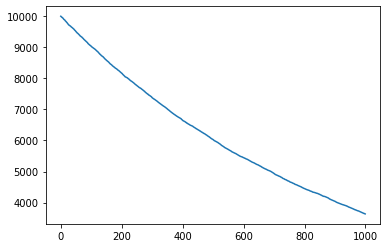

In [9]:
decay_rates = {0.001:[], 0.005:[], 0.02:[]}

for dr in decay_rates.keys():
    decay_rates[dr] = discrete_decay(10000, 1000, dr)



c:\users\hayoo\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


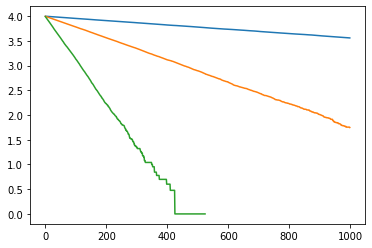

In [10]:
fig = plt.figure()
plt.plot(np.arange(ts), np.log10(decay_rates[0.001]))
plt.plot(np.arange(ts), np.log10(decay_rates[0.005]))
plt.plot(np.arange(ts), np.log10(decay_rates[0.02]))
plt.show()
